In [1]:

# SECTION 1: CONTROL STRUCTURES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset with error handling
try:
    df = pd.read_csv("trade-register.csv", encoding="latin1")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
except Exception as e:
    print("An unexpected error occurred:", e)

# Check missing values in each column
for column in df.columns:
    missing_count = df[column].isnull().sum()
    if missing_count > 0:
        print(column, "has", missing_count, "missing values")
    else:
        print(column, "has no missing values")

# Preview dataset
print(df.head())

Dataset loaded successfully.
ï»¿Recipient has 4 missing values
Supplier has no missing values
Year of order has no missing values
  has 13933 missing values
Number ordered has 290 missing values
 .1 has 17210 missing values
Weapon designation has 4 missing values
Weapon description has 4 missing values
Number delivered has 4 missing values
 .2 has 12992 missing values
Year(s) of delivery has 1159 missing values
status has 4 missing values
Comments has 5296 missing values
SIPRI TIV per unit has 8 missing values
SIPRI TIV for total order has 8 missing values
SIPRI TIV of delivered weapons has 8 missing values
  ï»¿Recipient       Supplier  Year of order       Number ordered   .1  \
0  Afghanistan         Russia         2002.0  NaN             3.0  NaN   
1  Afghanistan        Turkiye         2007.0  NaN            24.0  NaN   
2  Afghanistan  United States         2004.0    ?           188.0    ?   
3  Afghanistan  United States         2016.0  NaN            53.0  NaN   
4  Afghanistan 

In [2]:
# SECTION 2: FUNCTIONS & MODULES

def count_records(data):
    return len(data)

def get_basic_statistics(data, column):
    mean_val = data[column].mean()
    max_val = data[column].max()
    min_val = data[column].min()
    return mean_val, max_val, min_val

# Fix BOM column name
df.rename(columns={"ï»¿Recipient": "Recipient"}, inplace=True)

def get_country_percentage_share(data, country):
    total_orders = data["Number ordered"].sum()
    country_orders = data[data["Recipient"] == country]["Number ordered"].sum()
    if total_orders == 0:
        return 0
    return round((country_orders / total_orders) * 100, 2)

print("Total records:", count_records(df))

mean_val, max_val, min_val = get_basic_statistics(df, "Number ordered")
print("Mean:", round(mean_val, 2))
print("Max:", max_val)
print("Min:", min_val)

print("UK share (%):",
      get_country_percentage_share(df, "United Kingdom"))

Total records: 29507
Mean: 124.01
Max: 50000.0
Min: 1.0
UK share (%): 3.46


In [3]:
# SECTION 3: DATA HANDLING

df["Number ordered"] = pd.to_numeric(df["Number ordered"], errors="coerce")
df["Number ordered"] = df["Number ordered"].fillna(0)

df = df.loc[:, df.columns.str.strip() != ""]
df = df.loc[:, ~df.columns.str.contains(r"\.\d")]

filtered_df = df[df["Number ordered"] > 10]
print("Records after filtering:", len(filtered_df))

invalid_orders = df[df["Number ordered"] < 0]
print("Invalid records:", len(invalid_orders))

orders_by_country = df.groupby("Recipient")["Number ordered"].sum()
orders_by_country_sorted = orders_by_country.sort_values(ascending=False)

print(orders_by_country_sorted.head(10))

recipient_counts = df["Recipient"].value_counts()
print(recipient_counts.head(10))

print("Unique recipients:", df["Recipient"].nunique())
print("Unique suppliers:", df["Supplier"].nunique())

Records after filtering: 14422
Invalid records: 0
Recipient
India             254095.0
Saudi Arabia      173908.0
Germany           129551.0
United Kingdom    125220.0
Iraq              123750.0
Poland            121791.0
Egypt             119500.0
United States     114758.0
Iran              106216.0
Italy             104817.0
Name: Number ordered, dtype: float64
Recipient
India           764
Egypt           648
Thailand        609
Greece          574
Turkiye         574
Indonesia       555
Saudi Arabia    555
Pakistan        520
South Korea     513
Iraq            481
Name: count, dtype: int64
Unique recipients: 254
Unique suppliers: 140


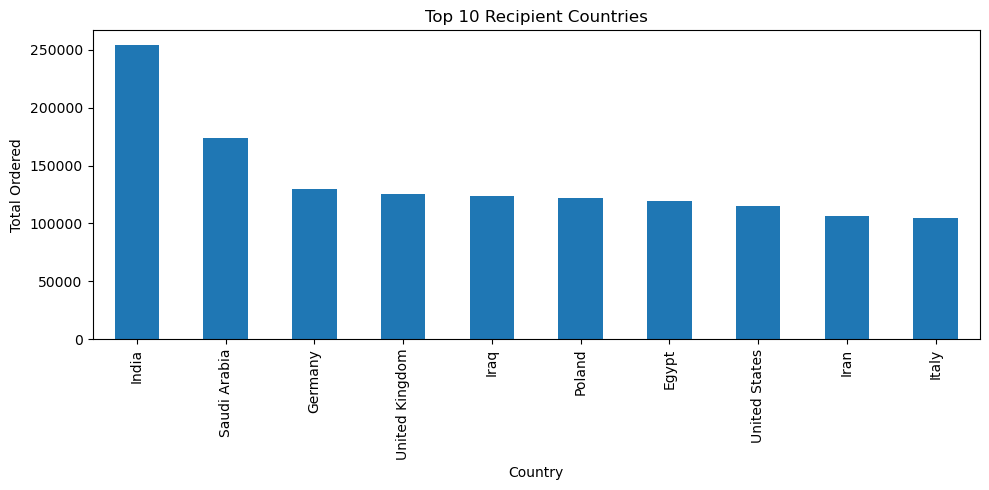

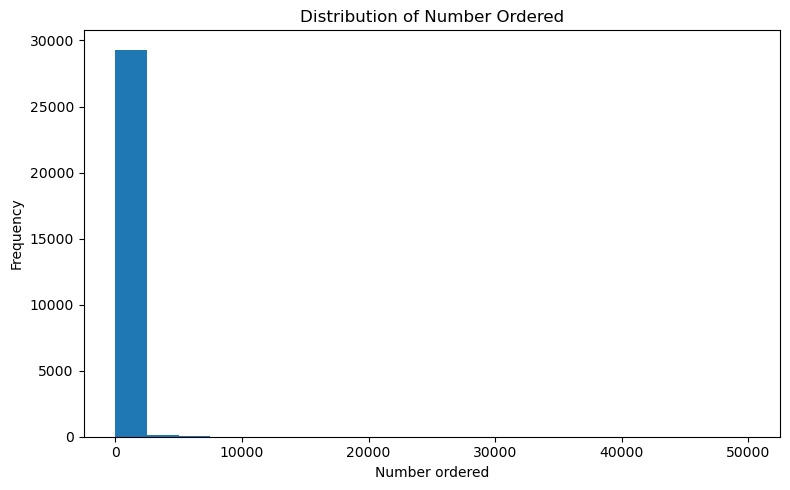

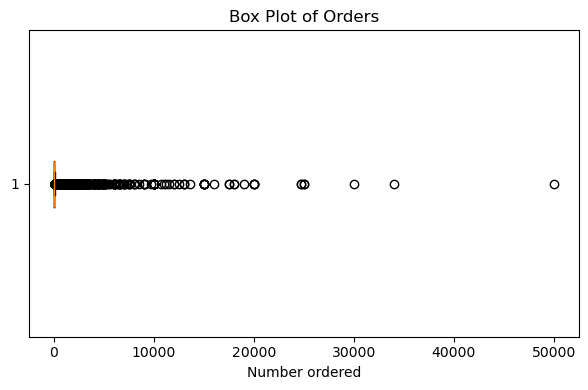

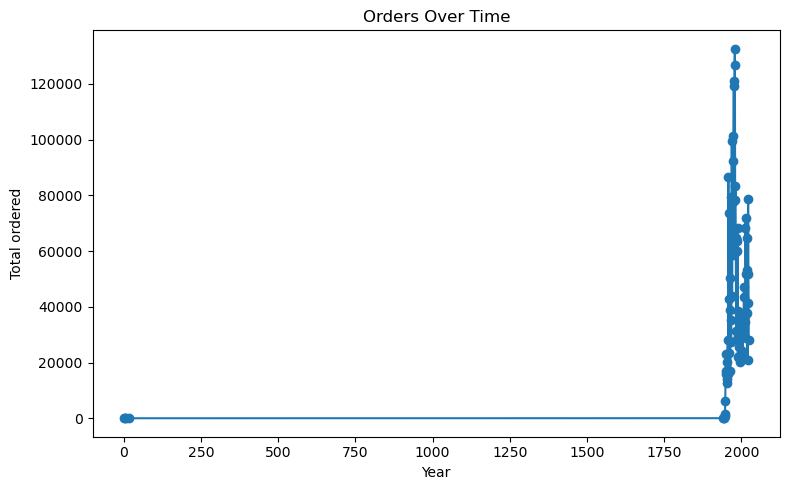

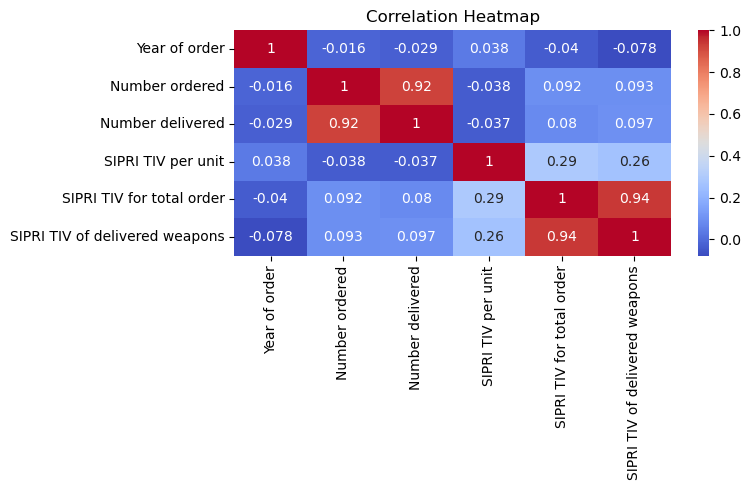

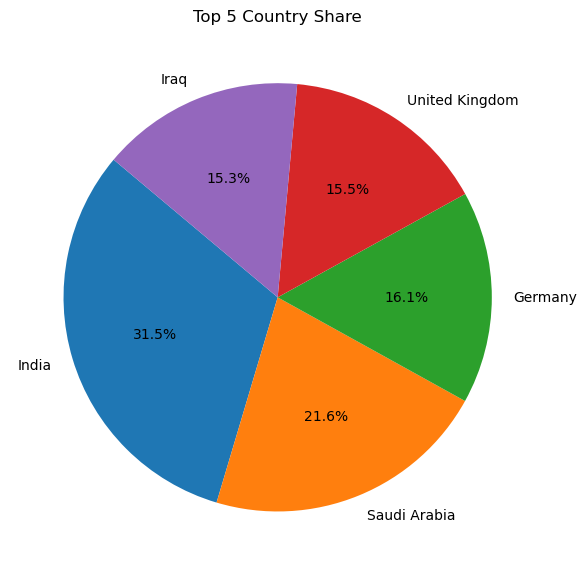

In [4]:
# SECTION 4: DATA VISUALISATION


# Plot 1: Bar chart
plt.figure(figsize=(10,5))
orders_by_country_sorted.head(10).plot(kind="bar")
plt.title("Top 10 Recipient Countries")
plt.xlabel("Country")
plt.ylabel("Total Ordered")
plt.tight_layout()
plt.show()

# Plot 2: Histogram
plt.figure(figsize=(8,5))
plt.hist(df["Number ordered"], bins=20)
plt.title("Distribution of Number Ordered")
plt.xlabel("Number ordered")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Plot 3: Box plot
plt.figure(figsize=(6,4))
plt.boxplot(df["Number ordered"], vert=False)
plt.title("Box Plot of Orders")
plt.xlabel("Number ordered")
plt.tight_layout()
plt.show()

# Plot 4: Orders over time
orders_by_year = (
    df.groupby("Year of order", dropna=True)["Number ordered"]
    .sum()
    .sort_index()
)

plt.figure(figsize=(8,5))
plt.plot(orders_by_year.index, orders_by_year.values, marker="o")
plt.title("Orders Over Time")
plt.xlabel("Year")
plt.ylabel("Total ordered")
plt.tight_layout()
plt.show()

# Plot 5: Correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Plot 6: Pie chart
top5 = orders_by_country_sorted.head(5)
plt.figure(figsize=(6,6))
plt.pie(top5, labels=top5.index, autopct="%1.1f%%", startangle=140)
plt.title("Top 5 Country Share")
plt.tight_layout()
plt.show()

In [5]:
# SECTION 5: GUI DEVELOPMENT


import tkinter as tk
from tkinter import messagebox

# Reusable functions
def get_basic_statistics(data, column):
    mean_val = data[column].mean()
    max_val = data[column].max()
    min_val = data[column].min()
    return mean_val, max_val, min_val

def get_country_total(data, country):
    return data[data["Recipient"] == country]["Number ordered"].sum()

def get_country_data(data, country):
    return data[data["Recipient"] == country]["Number ordered"]

# GUI callbacks
def show_statistics():
    mean_val, max_val, min_val = get_basic_statistics(df, "Number ordered")
    messagebox.showinfo(
        "Overall Statistics",
        f"Average Orders: {round(mean_val,2)}\n"
        f"Maximum Orders: {max_val}\n"
        f"Minimum Orders: {min_val}"
    )

def show_country_orders():
    country = country_var.get()
    if country == "Select Country":
        messagebox.showwarning("Warning", "Please select a country")
        return
    total = get_country_total(df, country)
    messagebox.showinfo(
        "Country Orders",
        f"Country: {country}\nTotal Orders: {total}"
    )

def show_country_chart():
    country = country_var.get()
    if country == "Select Country":
        messagebox.showwarning("Warning", "Please select a country")
        return
    data = get_country_data(df, country)
    if data.empty:
        messagebox.showinfo("No Data", "No records found")
        return
    plt.figure(figsize=(6,4))
    plt.hist(data, bins=10, edgecolor="black")
    plt.title(f"Order Distribution for {country}")
    plt.xlabel("Number ordered")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Window
root = tk.Tk()
root.title("Trade Data Dashboard")
root.geometry("520x420")
root.configure(bg="#121212")

# Header
header = tk.Frame(root, bg="#1f2933", height=60)
header.pack(fill="x")

title = tk.Label(
    header,
    text="Trade Data Interactive Dashboard",
    font=("Helvetica",16,"bold"),
    bg="#1f2933",
    fg="white"
)
title.pack(pady=15)

# Main frame
main_frame = tk.Frame(root, bg="#121212")
main_frame.pack(pady=20)

btn_stats = tk.Button(
    main_frame,
    text="Show Overall Statistics",
    width=30,
    bg="#4CAF50",
    fg="white",
    command=show_statistics
)
btn_stats.grid(row=0, column=0, pady=8)

# Dropdown
country_var = tk.StringVar()
country_var.set("Select Country")

countries = sorted(
    df["Recipient"]
    .dropna()
    .astype(str)
    .loc[lambda x: x.str.strip() != ""]
    .unique()
)

dropdown_label = tk.Label(
    main_frame,
    text="Select Recipient Country",
    bg="#121212",
    fg="white"
)
dropdown_label.grid(row=1, column=0, pady=5)

dropdown = tk.OptionMenu(main_frame, country_var, *countries)
dropdown.config(width=28)
dropdown.grid(row=2, column=0, pady=5)

btn_country = tk.Button(
    main_frame,
    text="Show Country Orders",
    width=30,
    bg="#2196F3",
    fg="white",
    command=show_country_orders
)
btn_country.grid(row=3, column=0, pady=8)

btn_chart = tk.Button(
    main_frame,
    text="Show Country Chart",
    width=30,
    bg="#FF9800",
    fg="white",
    command=show_country_chart
)
btn_chart.grid(row=4, column=0, pady=8)

footer = tk.Label(
    root,
    text="Interactive analysis of trade data using Python & Tkinter",
    bg="#121212",
    fg="#9ca3af"
)
footer.pack(side="bottom", pady=10)

root.mainloop()